In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
print(type(mnist))
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
55000
5000
10000


In [8]:
print("讓我們看一下 MNIST 訓練還有測試的資料集長得如何")
train_img = mnist.train.images
train_label = mnist.train.labels
test_img = mnist.test.images
test_label = mnist.test.labels
print
print(" train_img 的 type : %s" % (type(train_img)))
print(" train_img 的 dimension : %s" % (train_img.shape,))
print(" train_label 的 type : %s" % (type(train_label)))
print(" train_label 的 dimension : %s" % (train_label.shape,))
print(" test_img 的 type : %s" % (type(test_img)))
print(" test_img 的 dimension : %s" % (test_img.shape,))
print(" test_label 的 type : %s" % (type(test_label)))
print(" test_label 的 dimension : %s" % (test_label.shape,))

讓我們看一下 MNIST 訓練還有測試的資料集長得如何
 train_img 的 type : <class 'numpy.ndarray'>
 train_img 的 dimension : (55000, 784)
 train_label 的 type : <class 'numpy.ndarray'>
 train_label 的 dimension : (55000, 10)
 test_img 的 type : <class 'numpy.ndarray'>
 test_img 的 dimension : (10000, 784)
 test_label 的 type : <class 'numpy.ndarray'>
 test_label 的 dimension : (10000, 10)


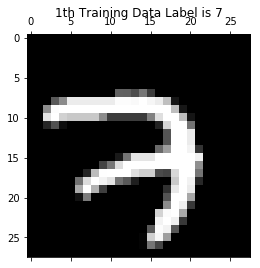

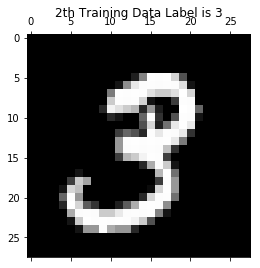

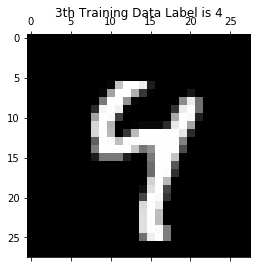

In [10]:
trainimg = mnist.train.images
trainlabel = mnist.train.labels
nsample = 1
randidx = np.random.randint(trainimg.shape[0], size=nsample)

for i in [0, 1, 2]:
    curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix of i
    curr_label = np.argmax(trainlabel[i, :] ) # Label of i
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(i + 1) + "th Training Data " 
              + "Label is " + str(curr_label))

In [11]:
print(np.reshape(trainimg[0], (28, 28)))  #28*28的array

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

In [12]:
print(np.argmax(trainlabel[0,:]))

7


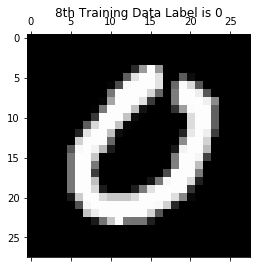

In [32]:
i = 7
curr_img   = np.reshape(trainimg[i, :], (28, 28)) # 28 by 28 matrix 
curr_label = np.argmax(trainlabel[i, :] ) # Label
plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
plt.title("" + str(i + 1) + "th Training Data " 
          + "Label is " + str(curr_label))

以上是查看資料結構以及定義train & test
以下是

In [16]:
import tensorflow as tf
learning_rate = 0.5
#佔位子 (placeholder)等待真正的值(2-D 的浮點數 tensor 來表現)，None 意味著它第一個維度可以是任一長度的
x = tf.placeholder(tf.float32, [None, 784])    
#模型參數用 Variables，建立了 W 和 b 這兩個都為 0 的 tensor
W = tf.Variable(tf.zeros([784, 10]))   
b = tf.Variable(tf.zeros([10]))
#
y = tf.nn.softmax(tf.matmul(x, W) + b)        #預測的機率分佈
y_ = tf.placeholder(tf.float32, [None, 10])   #真實的機率分佈 (one-hot 數字向量)

In [15]:
x = tf.placeholder(tf.float32, [None, 784])
x 

<tf.Tensor 'Placeholder:0' shape=(?, 784) dtype=float32>

In [22]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
#實際的y*log(預測的y)+reduction_indices=[1] => 成本函數 (量測我們的預測和真實之間的差距)

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
#使用梯度下降法 gradient descent algorithm 來最小化 cross_entropy，(learning rate) 是 0.5

#初始化我們所建立的變數
init = tf.global_variables_initializer()
# Session 來初始化我們的參數以及啟動我們的模型
sess = tf.Session()
sess.run(init)

for i in range(100000):
    batch_xs, batch_ys = mnist.train.next_batch(10000)
    #每一次 loop 中我們會從訓練數據中隨機抓取一批 10000 筆數據，然後把這些數據去替換掉之前我們設定的站位子 (placeholder)來進行訓練．
    sess.run(train_step, feed_dict = {x: batch_xs, y_: batch_ys})
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9252
